Задача 1 Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические
операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая
переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(zp)

Для определения возможности применения метода линейной регрессии смотрим на коэффициент корркляции Пирсона и график рапределения зависимости значения поведенческого кредитного скоринга заёмщиков банка от их заработной платы.

In [3]:
# находим коэффициент корркляции Пирсона
r = np.corrcoef(zp, ks)[1][0]
print('коэффициент корркляции Пирсона =', r)

коэффициент корркляции Пирсона = 0.8874900920739162


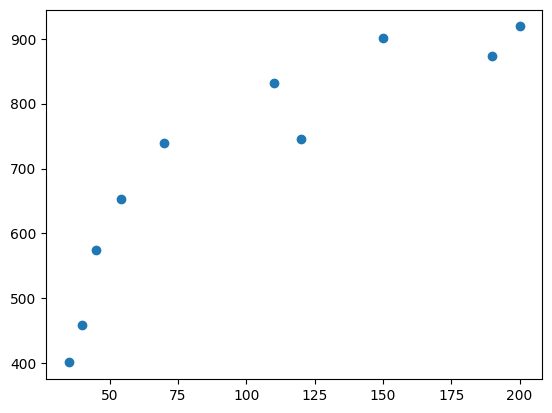

In [4]:
# строим график рапределения зависимости значения поведенческого кредитного скоринга заёмщиков банка от их заработной платы.
plt.scatter(zp, ks)

График и коэффициент корркляции Пирсона позволяют нам предположить о существовании линейной зависимости значения поведенческого кредитного скоринга заёмщиков банка от их заработной платы.

In [5]:
 # вычисляем коэффициенты линейной зависимости.
b = (n * sum(zp * ks) - sum(zp) * sum(ks)) / (n * sum(zp ** 2) - sum(zp) ** 2)
a = ks.mean() - b * zp.mean()
print('a = ' , a, 'b =', b)

a =  444.17735732435955 b = 2.6205388824027653


Проверяем вычсленную модель без intercept

In [6]:
# находим остатки регрессии
y = zp * b
resid = ks - zp * b
resid

array([309.28113912, 456.07575029, 376.09761234, 394.89222352,
       354.1784447 , 555.56227823, 511.49090035, 508.91916764,
       431.53533411, 543.74072294])

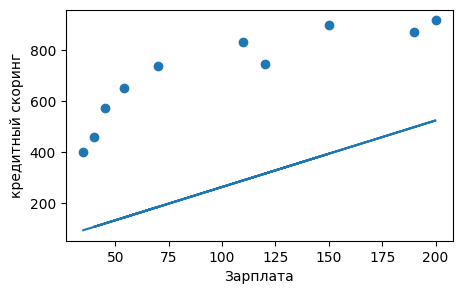

In [7]:
# строим график
plt.figure(figsize=(5, 3))
plt.plot(zp, y)
plt.scatter(zp, ks)
plt.xlabel('Зарплата')
plt.ylabel('кредитный скоринг')
plt.show()

Проверяем вычсленную модель с intercept

In [8]:
# находим остатки регрессии
y = zp * b + a
resid = ks - y
resid

array([-134.89621821,   11.89839297,  -68.07974498,  -49.2851338 ,
        -89.99891262,  111.38492091,   67.31354303,   64.74181032,
        -12.64202321,   99.56336561])

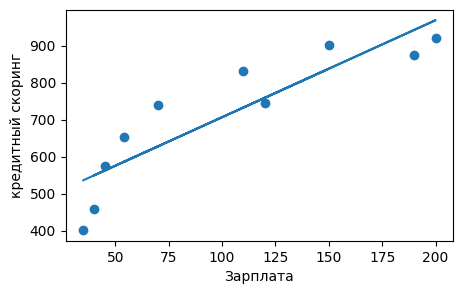

In [9]:
# строим график
plt.figure(figsize=(5, 3))
plt.plot(zp, y)
plt.scatter(zp, ks)
plt.xlabel('Зарплата')
plt.ylabel('кредитный скоринг')
plt.show()

Как видно из графиков, модель с intercept наиболее точная.

In [10]:
# проверка на нормальность
stats.shapiro(resid)

ShapiroResult(statistic=0.9479533433914185, pvalue=0.6443524360656738)

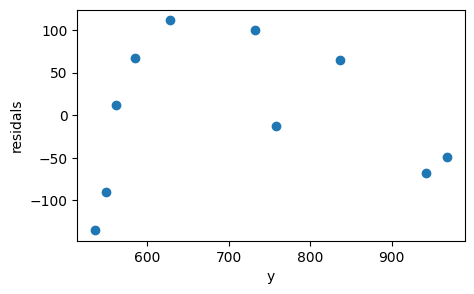

In [11]:
# проверка на Гомоскедастичность
plt.figure(figsize=(5, 3))
plt.scatter(y, resid)
plt.xlabel('y')
plt.ylabel('residals')
plt.show()

In [12]:
# вычисляем коэффициент детерминации
R2 = r ** 2
print('коэффициент детерминации =', R2)

коэффициент детерминации = 0.7876386635293682


In [13]:
# оцениваем значимость модели линейной регрессии используя критерий Фишера
F = (R2 / 1) / ((1 - R2) / (n - 1 - 1))
print('F =', F)

F = 29.671640859664432


Табличное значение критерия Фишера равно 5,32 расчётное значение равно 29.67. Делаем вывод что модель является статистически значимой.